In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('./data/creditcard.csv/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

In [3]:
def get_train_test_dataset(df=None):
    df_copy=get_preprocessed_df(df)
    X_features=df_copy.iloc[:,:-1]
    y_target=df_copy.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.3,random_state=0 ,stratify=y_target)
    return X_train,X_test,y_train,y_test

In [4]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [5]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('데스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
데스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy =accuracy_score(y_test,pred)
    precision=precision_score( y_test,pred)
    recall = recall_score(y_test,pred)
    f1= f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:4f}, 정밀도:{1:4f},재현율:{2:4f},F1:{3:4f},AUC:{4:4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [7]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test,lr_pred)

오차행렬
[[85282    13]
 [   57    91]]
정확도:0.999181, 정밀도:0.875000,재현율:0.614865,F1:0.722222,AUC:0.807356


In [8]:
def get_model_train_eval(model,ftr_train=None,ftr_test=None, tgt_train=None,tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test,pred)

In [9]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000,
                         num_leaves=64,
                         n_jobs=-1,
                         boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도:0.999520, 정밀도:0.957265,재현율:0.756757,F1:0.845283,AUC:0.878349


<AxesSubplot:xlabel='Amount', ylabel='Density'>

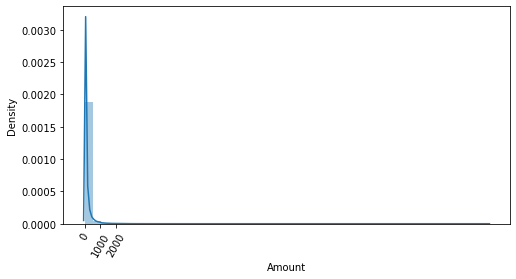

In [10]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,3000,1000),rotation=60)
sns.distplot(card_df['Amount'])

In [11]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy

In [12]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test = X_test, tgt_train=y_train, tgt_test=y_test)
print('###LightGBM예측성능###')
lgm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=1)
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능###
오차행렬
[[85281    14]
 [   58    90]]
정확도:0.999157, 정밀도:0.865385,재현율:0.608108,F1:0.714286,AUC:0.803972
###LightGBM예측성능###
오차행렬
[[85290     5]
 [   37   111]]
정확도:0.999508, 정밀도:0.956897,재현율:0.750000,F1:0.840909,AUC:0.874971


In [13]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [14]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test = X_test, tgt_train=y_train, tgt_test=y_test)
print('###LightGBM예측성능###')
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능###
오차행렬
[[85283    12]
 [   59    89]]
정확도:0.999169, 정밀도:0.881188,재현율:0.601351,F1:0.714859,AUC:0.800605
###LightGBM예측성능###
오차행렬
[[85290     5]
 [   35   113]]
정확도:0.999532, 정밀도:0.957627,재현율:0.763514,F1:0.849624,AUC:0.881727


<AxesSubplot:>

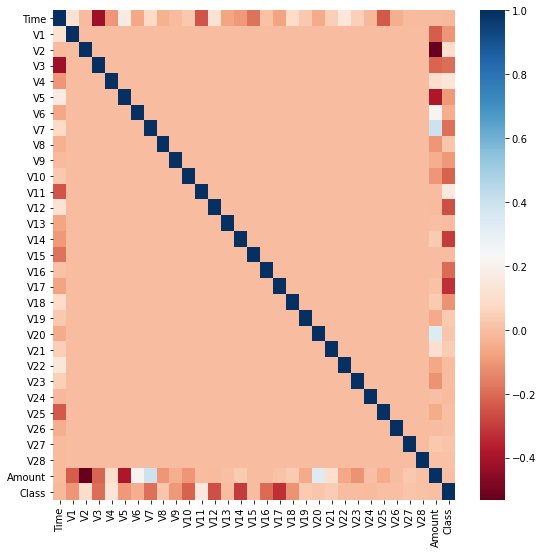

In [15]:
plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr,cmap='RdBu')

In [16]:
import numpy as np

def get_outlier(df=None,column=None,weight=1.5):
    fraud =df[df['Class']==1][column]
    quantile_25= np.percentile(fraud.values,25)
    quantile_75=np.percentile(fraud.values,75)
    iqr = quantile_75 -quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25-iqr_weight
    highest_val = quantile_75 + iqr_weight
    outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

In [17]:
outlier_index = get_outlier(df=card_df,column='V14',weight=1.5)
print('이상치 데이터 인덱스:',outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [18]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    outlier_index = get_outlier(df=df_copy,column='V14',weight = 1.5)
    df_copy.drop(outlier_index,axis=0,inplace=True)
    return df_copy

In [19]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test = X_test, tgt_train=y_train, tgt_test=y_test)
print('###LightGBM예측성능###')
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능###
오차행렬
[[85281    14]
 [   48    98]]
정확도:0.999274, 정밀도:0.875000,재현율:0.671233,F1:0.759690,AUC:0.835534
###LightGBM예측성능###
오차행렬
[[85290     5]
 [   25   121]]
정확도:0.999649, 정밀도:0.960317,재현율:0.828767,F1:0.889706,AUC:0.914354


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

In [21]:
X_train_over , y_train_over = smote.fit_sample(X_train,y_train)

In [22]:
print('SMOTE 적용 전 학습용 피쳐/레이블 데이터 세트:',X_train.shape,y_train.shape)
print('SMOTE 적용 후 학습용 피쳐/레이블 데이터 세트:',X_train_over.shape,y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n',pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피쳐/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피쳐/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


In [23]:
lr_clf = LogisticRegression()

In [24]:
get_model_train_eval(lr_clf,ftr_train=X_train_over, ftr_test=X_test,tgt_train=y_train_over,tgt_test=y_test)

오차행렬
[[82937  2358]
 [   11   135]]
정확도:0.972273, 정밀도:0.054152,재현율:0.924658,F1:0.102311,AUC:0.948506


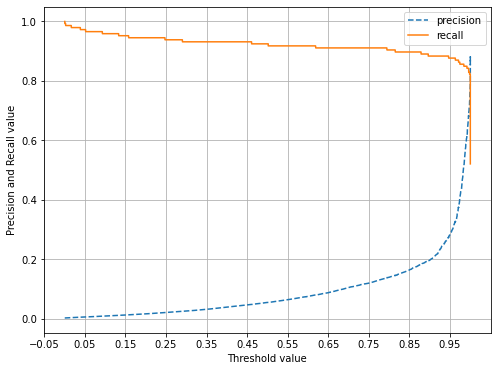

In [25]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,-1])

In [26]:
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

In [27]:
get_model_train_eval(lgbm_clf,ftr_train=X_train_over, ftr_test=X_test,tgt_train=y_train_over,tgt_test=y_test)

오차행렬
[[85283    12]
 [   22   124]]
정확도:0.999602, 정밀도:0.911765,재현율:0.849315,F1:0.879433,AUC:0.924587


In [28]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target
X_train,X_test,y_train,y_test = train_test_split(X_data,y_label,test_size=0.2,random_state=0)

In [29]:
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

lr_final = LogisticRegression(C=10)

In [30]:
knn_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [31]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)


In [32]:
print('KNN 정확도 : {0:4f}'.format(accuracy_score(y_test,knn_pred)))
print('램덤포레스트 정확도 : {0:4f}'.format(accuracy_score(y_test,rf_pred)))
print('결정트리 정확도 : {0:4f}'.format(accuracy_score(y_test,dt_pred)))
print('에이다부스트 정확도 : {0:4f}'.format(accuracy_score(y_test,ada_pred)))

KNN 정확도 : 0.921053
램덤포레스트 정확도 : 0.964912
결정트리 정확도 : 0.912281
에이다부스트 정확도 : 0.956140


In [33]:
pred = np.array([knn_pred,rf_pred,dt_pred,ada_pred])

In [34]:
print(pred.shape)

(4, 114)


In [35]:
pred= np.transpose(pred)
print(pred.shape)

(114, 4)


In [36]:
lr_final.fit(pred,y_test)
final=lr_final.predict(pred)

In [37]:
print('최종 메타 모델의 예측 정확도 : {0:4f}'.format(accuracy_score(y_test,final)))

최종 메타 모델의 예측 정확도 : 0.973684


In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model,X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred=np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__,'model 시작')
    for folder_counter,(train_index,valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트:',folder_counter,'시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr,y_tr)
        
        train_fold_pred[valid_index,:]=model.predict(X_te).reshape(-1,1)
        test_pred[:,folder_counter] = model.predict(X_test_n)
    test_pred_mean = np.mean(test_pred,axis=1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

In [39]:
knn_train,knn_test = get_stacking_base_datasets(knn_clf,X_train,y_train,X_test,7)
rf_train,rf_test = get_stacking_base_datasets(rf_clf,X_train,y_train,X_test,7)
dt_train,dt_test = get_stacking_base_datasets(dt_clf,X_train,y_train,X_test,7)
ada_train,ada_test = get_stacking_base_datasets(ada_clf,X_train,y_train,X_test,7)

KNeighborsClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
DecisionTreeClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
AdaBoostClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작


In [40]:
stack_final_X_train = np.concatenate((knn_train,rf_train,dt_train,ada_train),axis=1)
stack_final_X_test = np.concatenate((knn_test,rf_test,dt_test,ada_test),axis=1)

In [41]:
print('스태킹 학습 피처 텨데이터 Shape:', stack_final_X_train.shape,
     '스태킹 데스트 피처 데이터 Shape:',stack_final_X_test.shape)

스태킹 학습 피처 텨데이터 Shape: (455, 4) 스태킹 데스트 피처 데이터 Shape: (114, 4)


In [42]:
lr_final.fit(stack_final_X_train,y_train)
stack_final = lr_final.predict(stack_final_X_test)

In [43]:
print('최종 메타 모델의 예측 정확도:{0:4f}'.format(accuracy_score(y_test,stack_final)))

최종 메타 모델의 예측 정확도:0.973684
